In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_info = pd.read_csv('../DATA/lending_club_info.csv',index_col=[0])

In [3]:
print(df_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def data_info(col_name):
    print(df_info.loc[col_name]['Description'])

In [5]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [6]:
# Exploratory Data Analysis

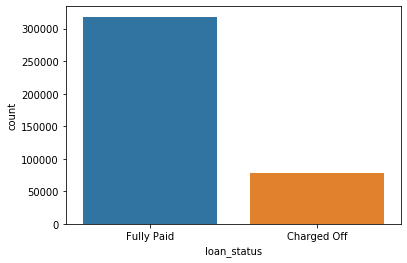

In [7]:
sns.countplot(x='loan_status',data=df)

In [8]:
# It's an unbalanced data, as there is lot less fradulent data available

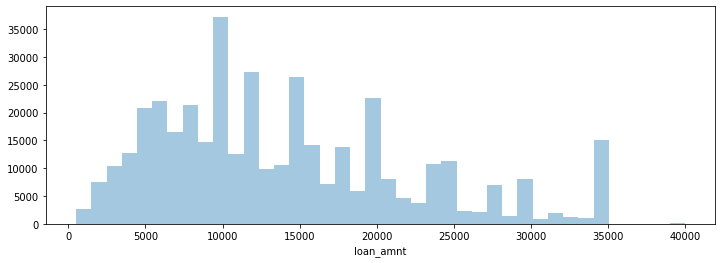

In [9]:
plt.figure(figsize=(12,4))

sns.distplot(df['loan_amnt'],kde=False, bins =40)

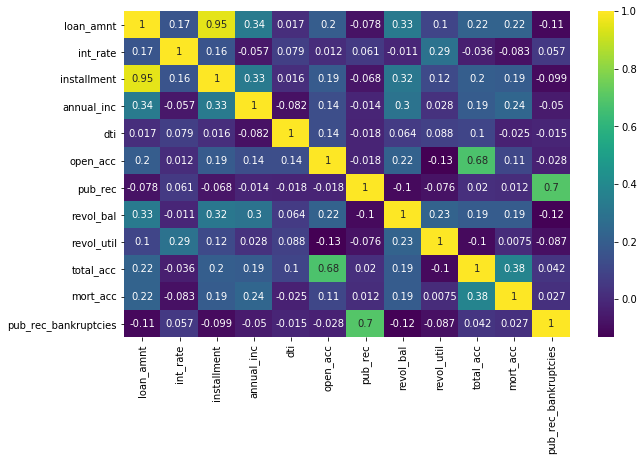

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [11]:
# the loan amount has a good realtionship with installment, as seen from the heatmap

In [12]:
data_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [13]:
data_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [14]:
#this represents the reason why there is correlation between the two features

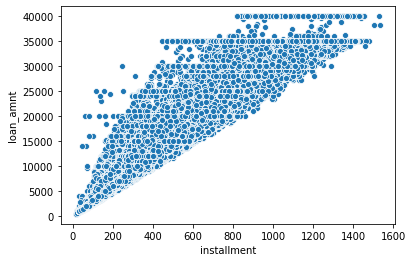

In [15]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

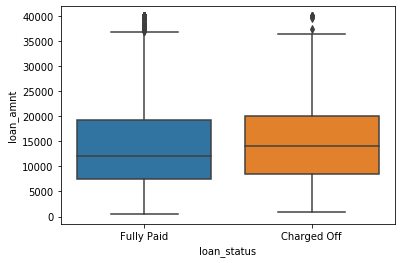

In [16]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [17]:
# this plot is to determine if there is correlation between loan amount and the repayment status
# here it can be seen that there is small relationship as suspected, higher the loan amount, it gets charged off.

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
# the above groupby feature gives us a better idea about the mean amounts in both the cases

In [20]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [21]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [22]:
#Loan status based on grade

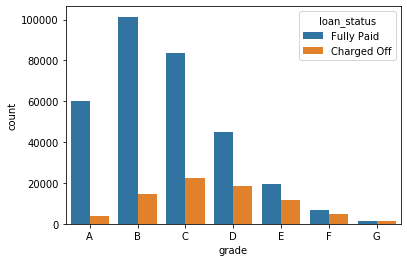

In [23]:
sns.countplot(x='grade', data = df, hue='loan_status',order=['A','B','C','D','E','F','G'])

In [24]:
# Re-ordering the countplot

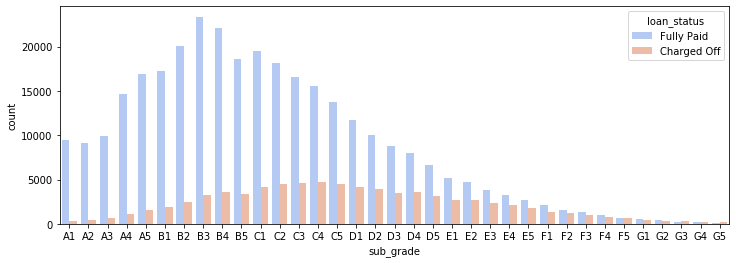

In [25]:
plt.figure(figsize=(12,4))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=sub_grade_order, palette = 'coolwarm', hue = 'loan_status')

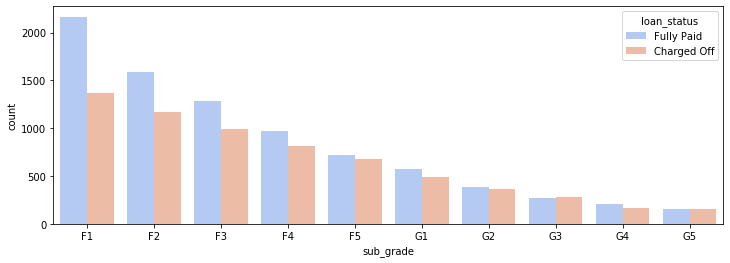

In [27]:
#isolating f and g group
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,4))
sub_grade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=sub_grade_order, palette = 'coolwarm', hue = 'loan_status')

In [28]:
# Creating a new column for classification of Loan Status

In [29]:
df['Loan_RepaymentStatus'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [30]:
df[['Loan_RepaymentStatus','loan_status']]

,Loan_RepaymentStatus,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


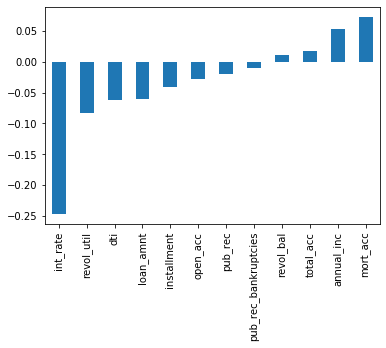

In [31]:
df.corr()['Loan_RepaymentStatus'].sort_values().drop('Loan_RepaymentStatus').plot(kind='bar')

In [32]:
#Figuing out the % of missing values in each coulmn

In [33]:
# Function to calculate missing values by column
def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits
    
    # Print some summary information
    print("Your slelected dataframe has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [34]:
df_missing_info= pd.DataFrame(missing_values_table(df))

Your slelected dataframe has 28 columns.
There are 6 columns that have missing values.


In [35]:
df_missing_info

,Missing Values,% of Total Values
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07


In [36]:
df_new = pd.concat([df,df_missing_info])

In [37]:
df_new

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Loan_RepaymentStatus,Missing Values,% of Total Values
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1.0,NaN,NaN
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1.0,NaN,NaN
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1.0,NaN,NaN
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1.0,NaN,NaN
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
emp_title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22927.0,5.79
emp_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18301.0,4.62
title,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1755.0,0.44
pub_rec_bankruptcies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0,0.14


In [39]:
data_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [40]:
#Should we drop or check for unique values

In [42]:
df['emp_title'].nunique()

173105

In [43]:
#there are too many titles to encode them or impute them

In [44]:
df = df.drop('emp_title',axis=1)

In [53]:
emp_length = []
emp_length = sorted(df['emp_length'].dropna().unique())

In [54]:
emp_length

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [59]:
emp_length_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

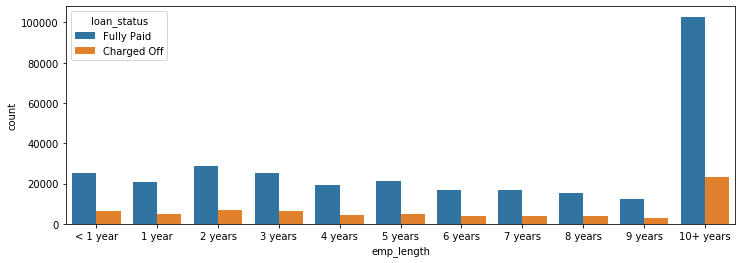

In [61]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order =emp_length_order, hue = 'loan_status')

In [62]:
# the above graph doesn't exactly tell us if there is a strong relationship between employment length and the loan being charged_off/paid
#The percent of ppl that didn't payback their loan in the respective emplyment category-this is important to draw a conclusion

In [69]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [70]:
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [78]:
emp_length_loan_status=(emp_co/(emp_co+emp_fp))*100

In [73]:
# It can be seen that the percentage is similar across the emp_length

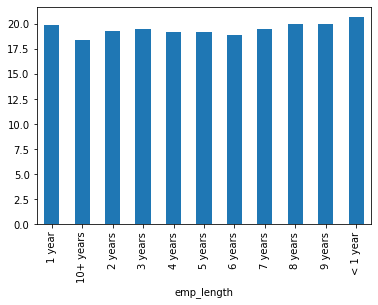

In [79]:
emp_length_loan_status.plot(kind='bar')

In [80]:
# Since the percentage is similar across all the categories, the column can be dropped

In [82]:
df = df.drop('emp_length',axis=1)

In [83]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
Loan_RepaymentStatus        0
dtype: int64

# Dealing with the Title column

In [84]:
data_info('title')

The loan title provided by the borrower


In [86]:
df['title'].nunique()

48817

In [87]:
data_info('purpose')

A category provided by the borrower for the loan request. 


In [89]:
#since both the fields are similar, we can drop the title column

In [90]:
df=df.drop('title',axis=1)

# Fixing the mor_acc column 

In [91]:
data_info('mort_acc')

Number of mortgage accounts.


In [92]:
#Exploring the column a bit, determining the no. of people with more than one mortgage accounts

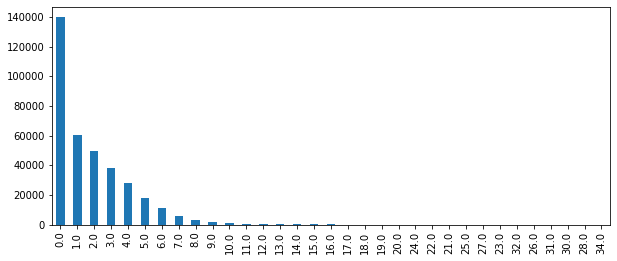

In [97]:
plt.figure(figsize=(10,4))
df['mort_acc'].value_counts().plot(kind='bar')

In [98]:
# Let's try and fill the missing values by checking if any correlation exists between the mor_acc and other columns

In [100]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
Loan_RepaymentStatus    0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [103]:
# the total account seems to have a positive correlation with the mort_acc

In [104]:
data_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [102]:
df.groupby('total_acc').mean()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies,Loan_RepaymentStatus
total_acc,,,,,,,,,,,,
2.0,6672.222222,15.801111,210.881667,64277.777778,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000,0.777778
3.0,6042.966361,15.615566,198.728318,41270.753884,6.502813,2.611621,0.045872,3382.807339,49.991022,0.052023,0.015480,0.779817
4.0,7587.399031,15.069491,250.050194,42426.565969,8.411963,3.324717,0.041195,4874.231826,58.477400,0.066743,0.022951,0.785945
5.0,7845.734714,14.917564,256.190325,44394.098003,10.118328,3.921598,0.071499,5475.253452,56.890311,0.103289,0.041171,0.796844
6.0,8529.019843,14.651752,278.518228,48470.001156,11.222542,4.511119,0.104003,6546.374957,57.812483,0.151293,0.055077,0.784126
...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,587.370000,66000.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000,0.000000
129.0,25000.000000,7.890000,505.600000,200000.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000,1.000000
135.0,24000.000000,15.410000,576.140000,82000.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,3.000000,0.000000,1.000000


In [105]:
# Let's try to find out how many average mort_acc are present against each category of total_acc

In [106]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [107]:
# since the total acc doesn't have an empty cell, we will use the above set of information to fill in empty cells in mort_acc column

In [108]:
# Storing the above result in  a list

In [109]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [110]:
# Filling the missing values using a similar technique to vlookup

In [112]:
def fill_mort_acc (total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [116]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [115]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
Loan_RepaymentStatus      0
dtype: int64

In [117]:
#Since the count of missing vlaues is less than 0.5% , we just drop the data with missing vlaues and not the columns

In [118]:
df = df.dropna()

In [119]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
Loan_RepaymentStatus    0
dtype: int64

# Dealing with Data Encoding of Categorical Variables 

In [120]:
#Filtering out categorical columns
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [121]:
data_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [122]:
#It is a binary classification, so it can be coverted into 0 and 1 or just convert into int

In [123]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [125]:
df['term']
#It's a quick way of converting the object type to int

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [126]:
# We can drop grade as subgrade contains similar information

In [127]:
df = df.drop('grade',axis=1)

In [128]:
# We will encode dummy variable for subgrade

In [129]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [131]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [133]:
dummies_new = pd.get_dummies(df[['verification_status',
       'purpose','initial_list_status', 'application_type']],drop_first=True)
df=pd.concat([df.drop(['verification_status',
       'purpose','initial_list_status', 'application_type'],axis=1),dummies_new],axis=1)

In [147]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,OTHER,OWN,RENT,zip_code
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,1,0,1,1,0,0,0,1,22690
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,1,0,0,0,0,05113
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,1,0,0,0,1,05113
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,1,0,0,0,1,00813
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,1,0,0,0,0,11650


# Home Ownership

In [135]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [136]:
# Since any and other have very few numbers, we will add it to other

In [139]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [140]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [141]:
# This is done to reduce the no.of features before encoding them

In [143]:
dummies_2 = pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df.drop('home_ownership',axis=1),dummies_2],axis=1)

In [144]:
# We will try and extract the zipcode from the address

In [145]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [148]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [149]:
# Since the no. of unique zipcode is limited, we can encode it

In [150]:
dummies_3 = pd.get_dummies(df['zip_code'],drop_first=True)
df=pd.concat([df.drop('zip_code',axis=1),dummies_3],axis=1)

In [151]:
df =df.drop('address',axis=1)

In [152]:
# Since the month in which loan was processed doesn't make sense as the time at which the model will be applie to a datapoint
#doesn't have any correlation we can drop it

In [153]:
df = df.drop('issue_d',axis=1)

In [161]:
data_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [156]:
# We will use the year in the earliest credit line

In [167]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [170]:
df['earliest_cr_line']
#the year column will be treated as a continuous variable

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

# Creating a ANN Model

In [172]:
from sklearn.model_selection import train_test_split

In [174]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'Loan_RepaymentStatus', 'A2', 'A3', 'A4', 'A5',
       'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2',
       'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4',
       'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'OTHER', 'OWN',
       '

In [175]:
df['Loan_RepaymentStatus']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: Loan_RepaymentStatus, Length: 395219, dtype: int64

In [176]:
#Since loan_status is availble in the form of 0s and 1s in the Loan RepaymentStatus column, lets drop it

In [194]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'Loan_RepaymentStatus',
       'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
       'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
       'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'initial_list_status_w',
       'application_type_INDIVIDUAL', 'application_type_JOINT', 'OTHER', 'OWN',
       'RENT', '05113', '11650

In [195]:
df=df.sample(frac=0.2,random_state=101)

In [193]:
df= df.drop('loan_status',axis=1)

KeyError: "['loan_status'] not found in axis"

In [209]:
df = df.drop('earliest_cr_line_month')

KeyError: "['earliest_cr_line_month'] not found in axis"

In [248]:
X=df.drop('Loan_RepaymentStatus',axis=1).values

In [249]:
y = df['Loan_RepaymentStatus'].values

In [182]:
# As the GPU isn't availble it is better to train with a sample fraction of the data set

In [250]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

In [251]:
X_train

array([[2.000e+04, 3.600e+01, 1.311e+01, ..., 0.000e+00, 1.000e+00,
        1.999e+03],
       [1.960e+04, 6.000e+01, 1.588e+01, ..., 0.000e+00, 0.000e+00,
        1.988e+03],
       [2.400e+04, 3.600e+01, 1.299e+01, ..., 0.000e+00, 0.000e+00,
        1.997e+03],
       ...,
       [1.500e+04, 6.000e+01, 1.333e+01, ..., 0.000e+00, 0.000e+00,
        2.004e+03],
       [8.400e+03, 3.600e+01, 1.199e+01, ..., 0.000e+00, 0.000e+00,
        1.988e+03],
       [1.200e+04, 3.600e+01, 8.390e+00, ..., 0.000e+00, 0.000e+00,
        1.983e+03]])

In [252]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

# Normalising / Scaling the data

In [201]:
from sklearn.preprocessing import MinMaxScaler

In [202]:
scaler = MinMaxScaler()

In [203]:
X_train = scaler.fit_transform(X_train)

In [204]:
X_test = scaler.transform(X_test)

In [206]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

In [210]:
X_train.shape

(2529, 79)

In [213]:
model = Sequential()

model.add(Dense(40, activation = 'relu'))

model.add(Dropout(0.2))

model.add(Dense(20, activation = 'relu'))

model.add(Dropout(0.2))

model.add(Dense(10, activation = 'relu'))

model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile (loss='binary_crossentropy', optimizer = 'adam')


In [221]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs = 400)

Train on 2529 samples, validate on 633 samples
Epoch 1/400
2529/2529 [==============================] - 0s 80us/sample - loss: 0.1634 - val_loss: 0.4200
Epoch 2/400
2529/2529 [==============================] - 0s 80us/sample - loss: 0.1602 - val_loss: 0.4242
Epoch 3/400
2529/2529 [==============================] - 0s 104us/sample - loss: 0.1557 - val_loss: 0.4820
Epoch 4/400
2529/2529 [==============================] - 0s 110us/sample - loss: 0.1592 - val_loss: 0.4544
Epoch 5/400
2529/2529 [==============================] - 0s 100us/sample - loss: 0.1540 - val_loss: 0.4511
Epoch 6/400
2529/2529 [==============================] - 0s 106us/sample - loss: 0.1650 - val_loss: 0.4381
Epoch 7/400
2529/2529 [==============================] - 0s 85us/sample - loss: 0.1506 - val_loss: 0.4938
Epoch 8/400
2529/2529 [==============================] - 0s 95us/sample - loss: 0.1482 - val_loss: 0.4960
Epoch 9/400
2529/2529 [==============================] - 0s 103us/sample - loss: 0.1560 - val_loss: 0

2529/2529 [==============================] - 0s 84us/sample - loss: 0.0734 - val_loss: 1.1278
Epoch 78/400
2529/2529 [==============================] - 0s 81us/sample - loss: 0.0750 - val_loss: 1.2012
Epoch 79/400
2529/2529 [==============================] - 0s 80us/sample - loss: 0.0764 - val_loss: 1.2098
Epoch 80/400
2529/2529 [==============================] - 0s 86us/sample - loss: 0.0708 - val_loss: 1.1787
Epoch 81/400
2529/2529 [==============================] - 0s 83us/sample - loss: 0.0771 - val_loss: 1.1645
Epoch 82/400
2529/2529 [==============================] - 0s 86us/sample - loss: 0.0665 - val_loss: 1.2237
Epoch 83/400
2529/2529 [==============================] - 0s 85us/sample - loss: 0.0718 - val_loss: 1.2748
Epoch 84/400
2529/2529 [==============================] - 0s 83us/sample - loss: 0.0755 - val_loss: 1.2388
Epoch 85/400
2529/2529 [==============================] - 0s 92us/sample - loss: 0.0723 - val_loss: 1.2647
Epoch 86/400
2529/2529 [==========================

2529/2529 [==============================] - 0s 81us/sample - loss: 0.0569 - val_loss: 1.8516
Epoch 154/400
2529/2529 [==============================] - 0s 81us/sample - loss: 0.0617 - val_loss: 1.6856
Epoch 155/400
2529/2529 [==============================] - 0s 83us/sample - loss: 0.0511 - val_loss: 1.6674
Epoch 156/400
2529/2529 [==============================] - 0s 84us/sample - loss: 0.0634 - val_loss: 1.7458
Epoch 157/400
2529/2529 [==============================] - 0s 86us/sample - loss: 0.0452 - val_loss: 1.8516
Epoch 158/400
2529/2529 [==============================] - 0s 82us/sample - loss: 0.0524 - val_loss: 1.7857
Epoch 159/400
2529/2529 [==============================] - 0s 76us/sample - loss: 0.0733 - val_loss: 1.6237
Epoch 160/400
2529/2529 [==============================] - 0s 84us/sample - loss: 0.0554 - val_loss: 1.6779
Epoch 161/400
2529/2529 [==============================] - 0s 86us/sample - loss: 0.0614 - val_loss: 1.7052
Epoch 162/400
2529/2529 [=================

Epoch 229/400
2529/2529 [==============================] - 0s 86us/sample - loss: 0.0366 - val_loss: 2.4911
Epoch 230/400
2529/2529 [==============================] - 0s 86us/sample - loss: 0.0456 - val_loss: 2.4956
Epoch 231/400
2529/2529 [==============================] - ETA: 0s - loss: 0.047 - 0s 90us/sample - loss: 0.0503 - val_loss: 2.4241
Epoch 232/400
2529/2529 [==============================] - 0s 88us/sample - loss: 0.0421 - val_loss: 2.4080
Epoch 233/400
2529/2529 [==============================] - 0s 87us/sample - loss: 0.0492 - val_loss: 2.4358
Epoch 234/400
2529/2529 [==============================] - 0s 84us/sample - loss: 0.0462 - val_loss: 2.4053
Epoch 235/400
2529/2529 [==============================] - 0s 91us/sample - loss: 0.0409 - val_loss: 2.6198
Epoch 236/400
2529/2529 [==============================] - 0s 82us/sample - loss: 0.0380 - val_loss: 2.5277
Epoch 237/400
2529/2529 [==============================] - 0s 87us/sample - loss: 0.0391 - val_loss: 2.4951
Epoc

2529/2529 [==============================] - 0s 99us/sample - loss: 0.0402 - val_loss: 3.0893
Epoch 305/400
2529/2529 [==============================] - 0s 107us/sample - loss: 0.0333 - val_loss: 3.1921
Epoch 306/400
2529/2529 [==============================] - 0s 96us/sample - loss: 0.0475 - val_loss: 2.9047
Epoch 307/400
2529/2529 [==============================] - 0s 96us/sample - loss: 0.0285 - val_loss: 3.1589
Epoch 308/400
2529/2529 [==============================] - 0s 100us/sample - loss: 0.0410 - val_loss: 2.9785
Epoch 309/400
2529/2529 [==============================] - 0s 102us/sample - loss: 0.0365 - val_loss: 3.1356
Epoch 310/400
2529/2529 [==============================] - 0s 97us/sample - loss: 0.0389 - val_loss: 3.3221
Epoch 311/400
2529/2529 [==============================] - 0s 97us/sample - loss: 0.0353 - val_loss: 3.2811
Epoch 312/400
2529/2529 [==============================] - 0s 92us/sample - loss: 0.0454 - val_loss: 3.0516
Epoch 313/400
2529/2529 [==============

Epoch 380/400
2529/2529 [==============================] - 0s 90us/sample - loss: 0.0323 - val_loss: 3.8366
Epoch 381/400
2529/2529 [==============================] - ETA: 0s - loss: 0.041 - 0s 93us/sample - loss: 0.0393 - val_loss: 3.8025
Epoch 382/400
2529/2529 [==============================] - 0s 88us/sample - loss: 0.0270 - val_loss: 3.9737
Epoch 383/400
2529/2529 [==============================] - 0s 87us/sample - loss: 0.0331 - val_loss: 4.0002
Epoch 384/400
2529/2529 [==============================] - 0s 89us/sample - loss: 0.0309 - val_loss: 3.8213
Epoch 385/400
2529/2529 [==============================] - 0s 92us/sample - loss: 0.0315 - val_loss: 3.9480
Epoch 386/400
2529/2529 [==============================] - 0s 91us/sample - loss: 0.0397 - val_loss: 3.6091
Epoch 387/400
2529/2529 [==============================] - 0s 90us/sample - loss: 0.0419 - val_loss: 3.7712
Epoch 388/400
2529/2529 [==============================] - 0s 88us/sample - loss: 0.0483 - val_loss: 3.7357
Epoc

# Evaluating and Saving the Model

In [217]:
from tensorflow.keras.models import load_model

In [218]:
# model.save('ClassificationANN.h5')

In [222]:
model_losses = pd.DataFrame (model.history.history)

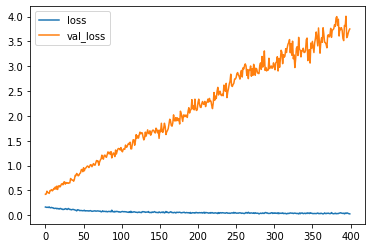

In [223]:
model_losses.plot()

In [224]:
from tensorflow.keras.callbacks import EarlyStopping

In [227]:
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose = 1, patience = 25)
#Mode can be min or max depending on the value we are trying to optimise.
#If its loss function, then we minimise
#if its accuracy then we maximise
# The patience waits for 25 more epochs after figuring out the stopping point to get rid of influence of noise in data 

In [226]:
model = Sequential()

model.add(Dense(40, activation = 'relu'))

model.add(Dropout(0.1))

model.add(Dense(20, activation = 'relu'))

model.add(Dropout(0.1))

model.add(Dense(10, activation = 'relu'))

model.add(Dropout(0.1))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile (loss='binary_crossentropy', optimizer = 'adam')


In [228]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs = 600,callbacks=[early_stop])

Train on 2529 samples, validate on 633 samples
Epoch 1/600
2529/2529 [==============================] - 1s 395us/sample - loss: 0.5877 - val_loss: 0.5093
Epoch 2/600
2529/2529 [==============================] - 0s 86us/sample - loss: 0.4711 - val_loss: 0.4569
Epoch 3/600
2529/2529 [==============================] - 0s 83us/sample - loss: 0.4118 - val_loss: 0.3846
Epoch 4/600
2529/2529 [==============================] - 0s 79us/sample - loss: 0.3570 - val_loss: 0.3619
Epoch 5/600
2529/2529 [==============================] - 0s 77us/sample - loss: 0.3232 - val_loss: 0.3364
Epoch 6/600
2529/2529 [==============================] - 0s 79us/sample - loss: 0.3093 - val_loss: 0.3341
Epoch 7/600
2529/2529 [==============================] - 0s 84us/sample - loss: 0.2899 - val_loss: 0.3252
Epoch 8/600
2529/2529 [==============================] - 0s 87us/sample - loss: 0.2829 - val_loss: 0.3221
Epoch 9/600
2529/2529 [==============================] - 0s 88us/sample - loss: 0.2775 - val_loss: 0.318

In [229]:
model_losses = pd.DataFrame (model.history.history)

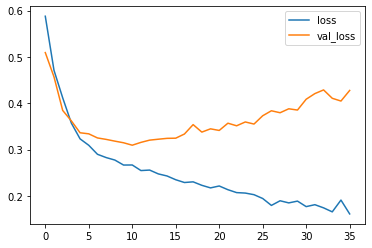

In [230]:
model_losses.plot()

In [233]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [234]:
from sklearn.model_selection import GridSearchCV

In [235]:
def build_classifier(optimiser):
    model = Sequential()
    model.add ( Dense(40, activation ='relu',kernel_initializer = 'glorot_uniform'))
    

    model.add ( Dense(20, activation ='relu',kernel_initializer = 'glorot_uniform'))

    model.add ( Dense(10, activation ='relu',kernel_initializer = 'glorot_uniform'))
    
    model.add(Dense(1,activation = 'sigmoid'))

    model.compile (loss='binary_crossentropy', optimizer=optimiser, metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=build_classifier)
parameters = {'epochs' :[ 25,50,100,200],
             'optimiser':['adam','rnsprop']}
grid_search = GridSearchCV(estimator = model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = None)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/25
2023/2023 [==============================] - 0s 186us/sample - loss: 0.5727 - acc: 0.7420
Epoch 2/25
2023/2023 [==============================] - 0s 63us/sample - loss: 0.4427 - acc: 0.8117
Epoch 3/25
2023/2023 [==============================] - 0s 68us/sample - loss: 0.3775 - acc: 0.8339
Epoch 4/25
2023/2023 [==============================] - 0s 63us/sample - loss: 0.3274 - acc: 0.8769
Epoch 5/25
2023/2023 [==============================] - 0s 63us/sample - loss: 0.2959 - acc: 0.8932
Epoch 6/25
2023/2023 [==============================] - 0s 66us/sample - loss: 0.2766 - acc: 0.8932
Epoch 7/25
2023/2023 [==============================] - 0s 73us/sample - loss: 0.2644 - acc: 0.8927
Epoch 8/25
2023/2023 [==============================] - 0s 72us/sample - loss: 0.2511 - acc: 0.8972
Epoch 9/25
2023/2023 [==============================] - 0s 70us/sample - loss: 0.2429 - acc: 0.8987
Epoch 10/25
2023/2023 [==============================] - 0s 67us/sample - loss: 0.2418 - acc: 0.898

2023/2023 [==============================] - 0s 56us/sample - loss: 0.2616 - acc: 0.8982
Epoch 8/25
2023/2023 [==============================] - 0s 54us/sample - loss: 0.2535 - acc: 0.8962
Epoch 9/25
2023/2023 [==============================] - 0s 54us/sample - loss: 0.2447 - acc: 0.9016
Epoch 10/25
2023/2023 [==============================] - 0s 53us/sample - loss: 0.2326 - acc: 0.9036
Epoch 11/25
2023/2023 [==============================] - 0s 54us/sample - loss: 0.2250 - acc: 0.9071
Epoch 12/25
2023/2023 [==============================] - 0s 64us/sample - loss: 0.2147 - acc: 0.9115
Epoch 13/25
2023/2023 [==============================] - 0s 60us/sample - loss: 0.2106 - acc: 0.90900s - loss: 0.2127 - acc: 0.906
Epoch 14/25
2023/2023 [==============================] - 0s 54us/sample - loss: 0.2012 - acc: 0.9204
Epoch 15/25
2023/2023 [==============================] - 0s 55us/sample - loss: 0.1930 - acc: 0.9214
Epoch 16/25
2023/2023 [==============================] - 0s 57us/sample - l

C:\Users\prasanth\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown optimizer: rnsprop

  FitFailedWarning)


Epoch 1/50
2023/2023 [==============================] - 0s 153us/sample - loss: 0.5591 - acc: 0.7672
Epoch 2/50
2023/2023 [==============================] - 0s 57us/sample - loss: 0.4523 - acc: 0.8117
Epoch 3/50
2023/2023 [==============================] - 0s 60us/sample - loss: 0.4037 - acc: 0.8127
Epoch 4/50
2023/2023 [==============================] - 0s 56us/sample - loss: 0.3401 - acc: 0.8675
Epoch 5/50
2023/2023 [==============================] - 0s 54us/sample - loss: 0.2933 - acc: 0.8947
Epoch 6/50
2023/2023 [==============================] - 0s 56us/sample - loss: 0.2678 - acc: 0.8957
Epoch 7/50
2023/2023 [==============================] - 0s 58us/sample - loss: 0.2565 - acc: 0.8982
Epoch 8/50
2023/2023 [==============================] - 0s 65us/sample - loss: 0.2482 - acc: 0.9011
Epoch 9/50
2023/2023 [==============================] - 0s 63us/sample - loss: 0.2421 - acc: 0.9011
Epoch 10/50
2023/2023 [==============================] - 0s 60us/sample - loss: 0.2332 - acc: 0.901

2023/2023 [==============================] - 0s 77us/sample - loss: 0.1191 - acc: 0.9511
Epoch 32/50
2023/2023 [==============================] - 0s 70us/sample - loss: 0.1180 - acc: 0.9481
Epoch 33/50
2023/2023 [==============================] - 0s 86us/sample - loss: 0.1107 - acc: 0.9585
Epoch 34/50
2023/2023 [==============================] - 0s 68us/sample - loss: 0.1190 - acc: 0.9525
Epoch 35/50
2023/2023 [==============================] - 0s 63us/sample - loss: 0.1094 - acc: 0.9555
Epoch 36/50
2023/2023 [==============================] - 0s 73us/sample - loss: 0.1042 - acc: 0.9580
Epoch 37/50
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0984 - acc: 0.9649
Epoch 38/50
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0941 - acc: 0.9654
Epoch 39/50
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0977 - acc: 0.9605
Epoch 40/50
2023/2023 [==============================] - 0s 75us/sample - loss: 0.0938 - acc: 0.9659
Ep

2023/2023 [==============================] - 0s 61us/sample - loss: 0.2310 - acc: 0.9086
Epoch 13/50
2023/2023 [==============================] - 0s 58us/sample - loss: 0.2179 - acc: 0.9036
Epoch 14/50
2023/2023 [==============================] - 0s 77us/sample - loss: 0.2121 - acc: 0.9090
Epoch 15/50
2023/2023 [==============================] - 0s 63us/sample - loss: 0.2084 - acc: 0.9056
Epoch 16/50
2023/2023 [==============================] - 0s 59us/sample - loss: 0.2006 - acc: 0.9110
Epoch 17/50
2023/2023 [==============================] - 0s 58us/sample - loss: 0.1880 - acc: 0.9214
Epoch 18/50
2023/2023 [==============================] - 0s 60us/sample - loss: 0.1835 - acc: 0.9224
Epoch 19/50
2023/2023 [==============================] - 0s 59us/sample - loss: 0.1767 - acc: 0.9259
Epoch 20/50
2023/2023 [==============================] - 0s 59us/sample - loss: 0.1734 - acc: 0.9239
Epoch 21/50
2023/2023 [==============================] - 0s 61us/sample - loss: 0.1798 - acc: 0.9234
Ep

2024/2024 [==============================] - 0s 59us/sample - loss: 0.0921 - acc: 0.9625
Epoch 44/50
2024/2024 [==============================] - 0s 63us/sample - loss: 0.0830 - acc: 0.9733
Epoch 45/50
2024/2024 [==============================] - 0s 59us/sample - loss: 0.0820 - acc: 0.9664
Epoch 46/50
2024/2024 [==============================] - 0s 69us/sample - loss: 0.0808 - acc: 0.9708
Epoch 47/50
2024/2024 [==============================] - 0s 72us/sample - loss: 0.0754 - acc: 0.9718
Epoch 48/50
2024/2024 [==============================] - 0s 73us/sample - loss: 0.0868 - acc: 0.9644
Epoch 49/50
2024/2024 [==============================] - 0s 80us/sample - loss: 0.0756 - acc: 0.9704
Epoch 50/50
2024/2024 [==============================] - 0s 74us/sample - loss: 0.0702 - acc: 0.9743
Epoch 1/100
2023/2023 [==============================] - 0s 176us/sample - loss: 0.5270 - acc: 0.7973
Epoch 2/100
2023/2023 [==============================] - 0s 62us/sample - loss: 0.4344 - acc: 0.8122
E

2023/2023 [==============================] - 0s 61us/sample - loss: 0.0286 - acc: 0.9901
Epoch 74/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0205 - acc: 0.9941
Epoch 75/100
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0208 - acc: 0.9936
Epoch 76/100
2023/2023 [==============================] - 0s 61us/sample - loss: 0.0195 - acc: 0.9960
Epoch 77/100
2023/2023 [==============================] - 0s 65us/sample - loss: 0.0240 - acc: 0.9936
Epoch 78/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0670 - acc: 0.9689
Epoch 79/100
2023/2023 [==============================] - 0s 58us/sample - loss: 0.0375 - acc: 0.9837
Epoch 80/100
2023/2023 [==============================] - 0s 61us/sample - loss: 0.0203 - acc: 0.9946
Epoch 81/100
2023/2023 [==============================] - 0s 71us/sample - loss: 0.0180 - acc: 0.9926
Epoch 82/100
2023/2023 [==============================] - 0s 73us/sample - loss: 0.0217 - acc: 

2023/2023 [==============================] - 0s 66us/sample - loss: 0.0548 - acc: 0.9792
Epoch 54/100
2023/2023 [==============================] - 0s 71us/sample - loss: 0.0564 - acc: 0.9797
Epoch 55/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0567 - acc: 0.9797
Epoch 56/100
2023/2023 [==============================] - 0s 61us/sample - loss: 0.0494 - acc: 0.9822
Epoch 57/100
2023/2023 [==============================] - 0s 61us/sample - loss: 0.0486 - acc: 0.9827
Epoch 58/100
2023/2023 [==============================] - 0s 67us/sample - loss: 0.0500 - acc: 0.9807
Epoch 59/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0506 - acc: 0.9797
Epoch 60/100
2023/2023 [==============================] - 0s 65us/sample - loss: 0.0448 - acc: 0.9832
Epoch 61/100
2023/2023 [==============================] - 0s 61us/sample - loss: 0.0478 - acc: 0.9822
Epoch 62/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0453 - acc: 

2023/2023 [==============================] - 0s 66us/sample - loss: 0.1080 - acc: 0.9506
Epoch 34/100
2023/2023 [==============================] - 0s 64us/sample - loss: 0.1064 - acc: 0.9550
Epoch 35/100
2023/2023 [==============================] - 0s 66us/sample - loss: 0.1030 - acc: 0.9560
Epoch 36/100
2023/2023 [==============================] - 0s 61us/sample - loss: 0.0987 - acc: 0.9614
Epoch 37/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0910 - acc: 0.9619
Epoch 38/100
2023/2023 [==============================] - 0s 67us/sample - loss: 0.0886 - acc: 0.9644
Epoch 39/100
2023/2023 [==============================] - 0s 62us/sample - loss: 0.0864 - acc: 0.9674
Epoch 40/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0797 - acc: 0.9689
Epoch 41/100
2023/2023 [==============================] - 0s 65us/sample - loss: 0.0782 - acc: 0.9718
Epoch 42/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0742 - acc: 

2023/2023 [==============================] - 0s 66us/sample - loss: 0.2226 - acc: 0.9051
Epoch 14/100
2023/2023 [==============================] - 0s 66us/sample - loss: 0.2082 - acc: 0.9110
Epoch 15/100
2023/2023 [==============================] - 0s 65us/sample - loss: 0.2000 - acc: 0.9214
Epoch 16/100
2023/2023 [==============================] - 0s 64us/sample - loss: 0.1953 - acc: 0.9204
Epoch 17/100
2023/2023 [==============================] - 0s 65us/sample - loss: 0.1851 - acc: 0.9239
Epoch 18/100
2023/2023 [==============================] - 0s 65us/sample - loss: 0.1864 - acc: 0.9189
Epoch 19/100
2023/2023 [==============================] - 0s 66us/sample - loss: 0.1774 - acc: 0.9278
Epoch 20/100
2023/2023 [==============================] - 0s 66us/sample - loss: 0.1705 - acc: 0.9283
Epoch 21/100
2023/2023 [==============================] - 0s 65us/sample - loss: 0.1647 - acc: 0.9254
Epoch 22/100
2023/2023 [==============================] - 0s 69us/sample - loss: 0.1595 - acc: 

2023/2023 [==============================] - 0s 66us/sample - loss: 0.0140 - acc: 0.9956
Epoch 94/100
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0146 - acc: 0.9956
Epoch 95/100
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0201 - acc: 0.9931
Epoch 96/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0180 - acc: 0.9926
Epoch 97/100
2023/2023 [==============================] - 0s 63us/sample - loss: 0.0185 - acc: 0.9936
Epoch 98/100
2023/2023 [==============================] - 0s 80us/sample - loss: 0.0137 - acc: 0.9960
Epoch 99/100
2023/2023 [==============================] - 0s 80us/sample - loss: 0.0129 - acc: 0.9956
Epoch 100/100
2023/2023 [==============================] - 0s 84us/sample - loss: 0.0140 - acc: 0.9941
Epoch 1/100
2024/2024 [==============================] - 0s 188us/sample - loss: 0.5089 - acc: 0.8034
Epoch 2/100
2024/2024 [==============================] - 0s 71us/sample - loss: 0.4367 - acc: 

Epoch 73/100
2024/2024 [==============================] - 0s 74us/sample - loss: 0.0223 - acc: 0.9926
Epoch 74/100
2024/2024 [==============================] - 0s 67us/sample - loss: 0.0158 - acc: 0.9951
Epoch 75/100
2024/2024 [==============================] - 0s 70us/sample - loss: 0.0267 - acc: 0.9896
Epoch 76/100
2024/2024 [==============================] - 0s 67us/sample - loss: 0.0199 - acc: 0.9931
Epoch 77/100
2024/2024 [==============================] - 0s 65us/sample - loss: 0.0166 - acc: 0.9941
Epoch 78/100
2024/2024 [==============================] - 0s 75us/sample - loss: 0.0125 - acc: 0.9960
Epoch 79/100
2024/2024 [==============================] - 0s 67us/sample - loss: 0.0105 - acc: 0.9970
Epoch 80/100
2024/2024 [==============================] - 0s 72us/sample - loss: 0.0299 - acc: 0.9886
Epoch 81/100
2024/2024 [==============================] - 0s 64us/sample - loss: 0.0234 - acc: 0.9916
Epoch 82/100
2024/2024 [==============================] - 0s 70us/sample - loss: 0

2023/2023 [==============================] - 0s 70us/sample - loss: 0.0406 - acc: 0.9867
Epoch 54/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0324 - acc: 0.9926
Epoch 55/200
2023/2023 [==============================] - 0s 66us/sample - loss: 0.0323 - acc: 0.9906
Epoch 56/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0320 - acc: 0.9906
Epoch 57/200
2023/2023 [==============================] - 0s 67us/sample - loss: 0.0296 - acc: 0.9911
Epoch 58/200
2023/2023 [==============================] - 0s 75us/sample - loss: 0.0291 - acc: 0.9921
Epoch 59/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0310 - acc: 0.9881
Epoch 60/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0347 - acc: 0.9886
Epoch 61/200
2023/2023 [==============================] - 0s 65us/sample - loss: 0.0269 - acc: 0.9941
Epoch 62/200
2023/2023 [==============================] - 0s 71us/sample - loss: 0.0272 - acc: 

2023/2023 [==============================] - 0s 66us/sample - loss: 0.0225 - acc: 0.9926
Epoch 134/200
2023/2023 [==============================] - 0s 71us/sample - loss: 0.0116 - acc: 0.9960
Epoch 135/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0094 - acc: 0.9970
Epoch 136/200
2023/2023 [==============================] - 0s 73us/sample - loss: 0.0146 - acc: 0.9951
Epoch 137/200
2023/2023 [==============================] - 0s 64us/sample - loss: 0.0119 - acc: 0.9960
Epoch 138/200
2023/2023 [==============================] - 0s 72us/sample - loss: 0.0074 - acc: 0.9980
Epoch 139/200
2023/2023 [==============================] - 0s 65us/sample - loss: 0.0114 - acc: 0.9965
Epoch 140/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0044 - acc: 0.9985
Epoch 141/200
2023/2023 [==============================] - 0s 89us/sample - loss: 0.0108 - acc: 0.9965
Epoch 142/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.015

2023/2023 [==============================] - 0s 73us/sample - loss: 0.2304 - acc: 0.8992
Epoch 13/200
2023/2023 [==============================] - 0s 66us/sample - loss: 0.2196 - acc: 0.9016
Epoch 14/200
2023/2023 [==============================] - 0s 66us/sample - loss: 0.2149 - acc: 0.9046
Epoch 15/200
2023/2023 [==============================] - 0s 66us/sample - loss: 0.2155 - acc: 0.9046
Epoch 16/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.2069 - acc: 0.9086
Epoch 17/200
2023/2023 [==============================] - 0s 72us/sample - loss: 0.2037 - acc: 0.9095
Epoch 18/200
2023/2023 [==============================] - 0s 73us/sample - loss: 0.1965 - acc: 0.9095
Epoch 19/200
2023/2023 [==============================] - 0s 66us/sample - loss: 0.1906 - acc: 0.9155
Epoch 20/200
2023/2023 [==============================] - 0s 65us/sample - loss: 0.1920 - acc: 0.9145
Epoch 21/200
2023/2023 [==============================] - 0s 71us/sample - loss: 0.1841 - acc: 

2023/2023 [==============================] - 0s 82us/sample - loss: 0.0415 - acc: 0.9807
Epoch 93/200
2023/2023 [==============================] - 0s 79us/sample - loss: 0.0363 - acc: 0.9857
Epoch 94/200
2023/2023 [==============================] - 0s 81us/sample - loss: 0.0273 - acc: 0.9901
Epoch 95/200
2023/2023 [==============================] - 0s 84us/sample - loss: 0.0262 - acc: 0.9906
Epoch 96/200
2023/2023 [==============================] - 0s 85us/sample - loss: 0.0316 - acc: 0.9876
Epoch 97/200
2023/2023 [==============================] - 0s 73us/sample - loss: 0.0212 - acc: 0.9946
Epoch 98/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0218 - acc: 0.9926
Epoch 99/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0207 - acc: 0.9931
Epoch 100/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0161 - acc: 0.9956
Epoch 101/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0181 - acc

2023/2023 [==============================] - 0s 73us/sample - loss: 0.0093 - acc: 0.9985
Epoch 172/200
2023/2023 [==============================] - 0s 67us/sample - loss: 0.0111 - acc: 0.9965
Epoch 173/200
2023/2023 [==============================] - 0s 65us/sample - loss: 0.0091 - acc: 0.9975
Epoch 174/200
2023/2023 [==============================] - 0s 67us/sample - loss: 0.0094 - acc: 0.9956
Epoch 175/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0054 - acc: 0.9990
Epoch 176/200
2023/2023 [==============================] - 0s 70us/sample - loss: 0.0058 - acc: 0.9985
Epoch 177/200
2023/2023 [==============================] - 0s 66us/sample - loss: 0.0100 - acc: 0.9965
Epoch 178/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0104 - acc: 0.9951
Epoch 179/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0129 - acc: 0.9946
Epoch 180/200
2023/2023 [==============================] - 0s 66us/sample - loss: 0.028

2023/2023 [==============================] - 0s 68us/sample - loss: 0.0564 - acc: 0.9773
Epoch 52/200
2023/2023 [==============================] - 0s 86us/sample - loss: 0.0452 - acc: 0.9847
Epoch 53/200
2023/2023 [==============================] - 0s 88us/sample - loss: 0.0436 - acc: 0.9876
Epoch 54/200
2023/2023 [==============================] - 0s 94us/sample - loss: 0.0439 - acc: 0.9871
Epoch 55/200
2023/2023 [==============================] - 0s 81us/sample - loss: 0.0459 - acc: 0.9852
Epoch 56/200
2023/2023 [==============================] - 0s 70us/sample - loss: 0.0416 - acc: 0.9857
Epoch 57/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0450 - acc: 0.9842
Epoch 58/200
2023/2023 [==============================] - 0s 71us/sample - loss: 0.0397 - acc: 0.9881
Epoch 59/200
2023/2023 [==============================] - 0s 71us/sample - loss: 0.0380 - acc: 0.9857
Epoch 60/200
2023/2023 [==============================] - 0s 70us/sample - loss: 0.0419 - acc: 

2023/2023 [==============================] - 0s 77us/sample - loss: 0.0016 - acc: 1.0000
Epoch 131/200
2023/2023 [==============================] - 0s 76us/sample - loss: 0.0017 - acc: 1.0000
Epoch 132/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0014 - acc: 1.0000
Epoch 133/200
2023/2023 [==============================] - 0s 67us/sample - loss: 0.0015 - acc: 1.0000
Epoch 134/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0024 - acc: 0.9995
Epoch 135/200
2023/2023 [==============================] - 0s 71us/sample - loss: 0.0071 - acc: 0.9980
Epoch 136/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.0683 - acc: 0.9817
Epoch 137/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.0645 - acc: 0.9797
Epoch 138/200
2023/2023 [==============================] - 0s 72us/sample - loss: 0.0320 - acc: 0.9871
Epoch 139/200
2023/2023 [==============================] - 0s 71us/sample - loss: 0.018

2023/2023 [==============================] - 0s 72us/sample - loss: 0.2643 - acc: 0.8952
Epoch 9/200
2023/2023 [==============================] - 0s 68us/sample - loss: 0.2546 - acc: 0.8927
Epoch 10/200
2023/2023 [==============================] - 0s 71us/sample - loss: 0.2491 - acc: 0.9001
Epoch 11/200
2023/2023 [==============================] - 0s 75us/sample - loss: 0.2411 - acc: 0.8987
Epoch 12/200
2023/2023 [==============================] - 0s 70us/sample - loss: 0.2335 - acc: 0.9036
Epoch 13/200
2023/2023 [==============================] - 0s 74us/sample - loss: 0.2286 - acc: 0.9076
Epoch 14/200
2023/2023 [==============================] - 0s 78us/sample - loss: 0.2207 - acc: 0.9061
Epoch 15/200
2023/2023 [==============================] - 0s 89us/sample - loss: 0.2178 - acc: 0.9100
Epoch 16/200
2023/2023 [==============================] - 0s 69us/sample - loss: 0.2094 - acc: 0.9130
Epoch 17/200
2023/2023 [==============================] - 0s 70us/sample - loss: 0.2119 - acc: 0

2023/2023 [==============================] - 0s 103us/sample - loss: 0.0329 - acc: 0.9881
Epoch 89/200
2023/2023 [==============================] - 0s 89us/sample - loss: 0.0258 - acc: 0.9926
Epoch 90/200
2023/2023 [==============================] - 0s 84us/sample - loss: 0.0301 - acc: 0.9901
Epoch 91/200
2023/2023 [==============================] - 0s 72us/sample - loss: 0.0287 - acc: 0.9891
Epoch 92/200
2023/2023 [==============================] - 0s 82us/sample - loss: 0.0216 - acc: 0.9951
Epoch 93/200
2023/2023 [==============================] - 0s 73us/sample - loss: 0.0191 - acc: 0.9941
Epoch 94/200
2023/2023 [==============================] - 0s 70us/sample - loss: 0.0239 - acc: 0.9941
Epoch 95/200
2023/2023 [==============================] - 0s 72us/sample - loss: 0.0242 - acc: 0.9951
Epoch 96/200
2023/2023 [==============================] - 0s 70us/sample - loss: 0.0227 - acc: 0.9921
Epoch 97/200
2023/2023 [==============================] - 0s 73us/sample - loss: 0.0289 - acc:

2023/2023 [==============================] - 0s 70us/sample - loss: 0.0231 - acc: 0.9916
Epoch 168/200
2023/2023 [==============================] - 0s 70us/sample - loss: 0.0360 - acc: 0.9871
Epoch 169/200
2023/2023 [==============================] - 0s 85us/sample - loss: 0.0092 - acc: 0.9970
Epoch 170/200
2023/2023 [==============================] - 0s 99us/sample - loss: 0.0088 - acc: 0.9980
Epoch 171/200
2023/2023 [==============================] - 0s 102us/sample - loss: 0.0068 - acc: 0.9990
Epoch 172/200
2023/2023 [==============================] - 0s 108us/sample - loss: 0.0052 - acc: 0.9985
Epoch 173/200
2023/2023 [==============================] - 0s 116us/sample - loss: 0.0038 - acc: 0.9995s - loss: 0.0030 - acc: 1.00
Epoch 174/200
2023/2023 [==============================] - 0s 86us/sample - loss: 0.0064 - acc: 0.9980
Epoch 175/200
2023/2023 [==============================] - 0s 100us/sample - loss: 0.0046 - acc: 0.9990
Epoch 176/200
2023/2023 [==============================

2024/2024 [==============================] - 0s 89us/sample - loss: 0.0914 - acc: 0.9649
Epoch 47/200
2024/2024 [==============================] - 0s 94us/sample - loss: 0.0870 - acc: 0.9669
Epoch 48/200
2024/2024 [==============================] - 0s 93us/sample - loss: 0.0793 - acc: 0.9684
Epoch 49/200
2024/2024 [==============================] - 0s 93us/sample - loss: 0.0732 - acc: 0.9713
Epoch 50/200
2024/2024 [==============================] - 0s 91us/sample - loss: 0.0728 - acc: 0.9743
Epoch 51/200
2024/2024 [==============================] - 0s 92us/sample - loss: 0.0806 - acc: 0.9669
Epoch 52/200
2024/2024 [==============================] - 0s 90us/sample - loss: 0.0727 - acc: 0.9708
Epoch 53/200
2024/2024 [==============================] - 0s 92us/sample - loss: 0.0624 - acc: 0.9797
Epoch 54/200
2024/2024 [==============================] - 0s 90us/sample - loss: 0.0662 - acc: 0.9758
Epoch 55/200
2024/2024 [==============================] - 0s 91us/sample - loss: 0.0630 - acc: 

2024/2024 [==============================] - 0s 84us/sample - loss: 0.0101 - acc: 0.9975
Epoch 127/200
2024/2024 [==============================] - 0s 93us/sample - loss: 0.0134 - acc: 0.9946
Epoch 128/200
2024/2024 [==============================] - 0s 84us/sample - loss: 0.0219 - acc: 0.9916
Epoch 129/200
2024/2024 [==============================] - 0s 83us/sample - loss: 0.0099 - acc: 0.9965
Epoch 130/200
2024/2024 [==============================] - 0s 86us/sample - loss: 0.0117 - acc: 0.9970
Epoch 131/200
2024/2024 [==============================] - 0s 86us/sample - loss: 0.0116 - acc: 0.9970
Epoch 132/200
2024/2024 [==============================] - 0s 87us/sample - loss: 0.0110 - acc: 0.9946
Epoch 133/200
2024/2024 [==============================] - 0s 90us/sample - loss: 0.1011 - acc: 0.9664
Epoch 134/200
2024/2024 [==============================] - 0s 85us/sample - loss: 0.0649 - acc: 0.9733
Epoch 135/200
2024/2024 [==============================] - 0s 101us/sample - loss: 0.02

2529/2529 [==============================] - 0s 82us/sample - loss: 0.2816 - acc: 0.8897
Epoch 6/25
2529/2529 [==============================] - 0s 74us/sample - loss: 0.2682 - acc: 0.8921
Epoch 7/25
2529/2529 [==============================] - 0s 74us/sample - loss: 0.2613 - acc: 0.8948
Epoch 8/25
2529/2529 [==============================] - 0s 75us/sample - loss: 0.2607 - acc: 0.8909
Epoch 9/25
2529/2529 [==============================] - 0s 73us/sample - loss: 0.2510 - acc: 0.8960
Epoch 10/25
2529/2529 [==============================] - 0s 72us/sample - loss: 0.2476 - acc: 0.8936
Epoch 11/25
2529/2529 [==============================] - 0s 92us/sample - loss: 0.2432 - acc: 0.8992
Epoch 12/25
2529/2529 [==============================] - 0s 89us/sample - loss: 0.2348 - acc: 0.9031
Epoch 13/25
2529/2529 [==============================] - 0s 99us/sample - loss: 0.2316 - acc: 0.9011
Epoch 14/25
2529/2529 [==============================] - 0s 93us/sample - loss: 0.2250 - acc: 0.9047
Epoch 

In [236]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [237]:
best_parameters

{'epochs': 25, 'optimiser': 'adam'}

In [240]:
    model = Sequential()
    
    model.add ( Dense(40, activation ='relu',kernel_initializer = 'glorot_uniform'))
    

    model.add ( Dense(20, activation ='relu',kernel_initializer = 'glorot_uniform'))

    model.add ( Dense(10, activation ='relu',kernel_initializer = 'glorot_uniform'))
    
    model.add(Dense(1,activation = 'sigmoid'))

    model.compile (loss='binary_crossentropy', optimizer='adam')

In [241]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test), epochs = 25)

Train on 2529 samples, validate on 633 samples
Epoch 1/25
2529/2529 [==============================] - 3s 1ms/sample - loss: 0.5453 - val_loss: 0.4865
Epoch 2/25
2529/2529 [==============================] - 0s 117us/sample - loss: 0.4341 - val_loss: 0.4084
Epoch 3/25
2529/2529 [==============================] - 0s 135us/sample - loss: 0.3414 - val_loss: 0.3555
Epoch 4/25
2529/2529 [==============================] - 0s 105us/sample - loss: 0.2973 - val_loss: 0.3300
Epoch 5/25
2529/2529 [==============================] - 0s 108us/sample - loss: 0.2797 - val_loss: 0.3117
Epoch 6/25
2529/2529 [==============================] - 0s 102us/sample - loss: 0.2752 - val_loss: 0.3126
Epoch 7/25
2529/2529 [==============================] - 0s 116us/sample - loss: 0.2631 - val_loss: 0.3065
Epoch 8/25
2529/2529 [==============================] - 0s 105us/sample - loss: 0.2518 - val_loss: 0.3078
Epoch 9/25
2529/2529 [==============================] - 0s 124us/sample - loss: 0.2489 - val_loss: 0.3066
E

In [242]:
model_losses = pd.DataFrame (model.history.history)

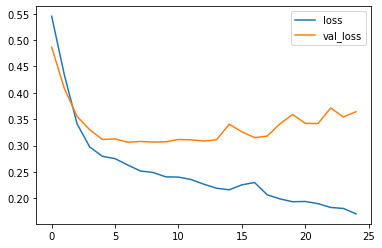

In [243]:
model_losses.plot()

In [245]:
from sklearn.metrics import classification_report, confusion_matrix

In [254]:
predictions = model.predict(X_test)

In [255]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.79      1.00      0.88       501

    accuracy                           0.79       633
   macro avg       0.40      0.50      0.44       633
weighted avg       0.63      0.79      0.70       633



C:\Users\prasanth\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
